This clustering exercise will use a dataset provided by Walmart. It was published in a Kaggle competition on Monday 26 October 2015. The goal of the competition was to predict the category of each visit according to 6 predictors and 38 categories given by Walmart in the training set. My purpose is not to predict, but to use this data set (training) to apply some clustering analysis and determine the best number of clusters (from a numerical standpoint only). Below is the dataset description from Kaggle:

### Trip Type Classification - Data fields

**TripType** - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.     
**VisitNumber** - an id corresponding to a single trip by a single customer.    
**Weekday** - the weekday of the trip    
**Upc** - the UPC number of the product purchased    
**ScanCount** - the number of the given item that was purchased. A negative value indicates a product return.    
**DepartmentDescription** - a high-level description of the item's department     
**FinelineNumber** - a more refined category for each of the products, created by Walmart     
          

# --*DATA PREPARATION*--
  

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# import wallmart csv

df= pd.read_csv('walmart.csv')

In [3]:
df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


In [5]:
# number of different values in each column
for i in df.columns.values:
    print(len(df[i].value_counts()))

38
95674
7
97714
39
68
5195


In [6]:
# I will delete the 'TripType' column since I am not concerned 
# with the previous categorization. I won't be predicting anything.
del df['TripType'] 

In [7]:
# I will delete the 'Upc' columns due to processing power constraints 
# (97714 dummy variables!)
del df['Upc']

In [8]:
# to drop Null values
df.dropna(inplace=True)

In [9]:
df.shape

(642925, 5)

In [10]:
df.head(2)

,VisitNumber,Weekday,ScanCount,DepartmentDescription,FinelineNumber
0,5,Friday,-1,FINANCIAL SERVICES,1000.0
1,7,Friday,1,SHOES,8931.0


In [11]:
# I will also work only with a sample of 'FinelineNumber' to avoid doing 
# 5195 dummy variables.
# Sample will be 20% of all categoires.
d = df['FinelineNumber'].copy()
d.drop_duplicates(inplace=True)
df_sam = d.sample(frac=.8, replace=False)

In [12]:
for val in df_sam.values:
    df = df[df['FinelineNumber'] != val]

In [13]:
# Finally I will take a sample of 20% from the dataset to further 
# improve processing speed.
df = df.sample(frac=.2, replace=Fa

In [14]:
df.reset_index(inplace=True)

In [15]:
del df['index']

In [16]:
df.shape

(30721, 5)

In [17]:
# to create dummy variables for each column except 'VisitNumber' and 'ScanCount'.
df_dummy= pd.get_dummies(df, columns=['Weekday','DepartmentDescription',
                                    'FinelineNumber'], drop_first=False)

In [18]:
df_dummy.shape

(30721, 994)

In [19]:
df_dummy.head(3)

,VisitNumber,ScanCount,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,DepartmentDescription_1-HR PHOTO,...,FinelineNumber_9530.0,FinelineNumber_9551.0,FinelineNumber_9570.0,FinelineNumber_9610.0,FinelineNumber_9635.0,FinelineNumber_9636.0,FinelineNumber_9862.0,FinelineNumber_9922.0,FinelineNumber_9938.0,FinelineNumber_9966.0
0,80054,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,91269,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,155958,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# to create a simple aggregation by visit number 
df_final = df_dummy.groupby(['VisitNumber','Weekday_Monday',
                'Weekday_Tuesday','Weekday_Wednesday','Weekday_Thursday',
                    'Weekday_Friday','Weekday_Saturday',
                             'Weekday_Sunday']).sum().reset_index()
df_final.head(4)

,VisitNumber,Weekday_Monday,Weekday_Tuesday,Weekday_Wednesday,Weekday_Thursday,Weekday_Friday,Weekday_Saturday,Weekday_Sunday,ScanCount,DepartmentDescription_1-HR PHOTO,...,FinelineNumber_9530.0,FinelineNumber_9551.0,FinelineNumber_9570.0,FinelineNumber_9610.0,FinelineNumber_9635.0,FinelineNumber_9636.0,FinelineNumber_9862.0,FinelineNumber_9922.0,FinelineNumber_9938.0,FinelineNumber_9966.0
0,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# --*DATA EXPLORATION*--

In [21]:
# to explore visits by day of the week
days_totals = df_final.ix[:,1:8].sum()
days_totals.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
days_totals

Mon    2863.0
Tue    2583.0
Wed    2490.0
Thu    2476.0
Fri    3378.0
Sat    4076.0
Sun    4328.0
dtype: float64

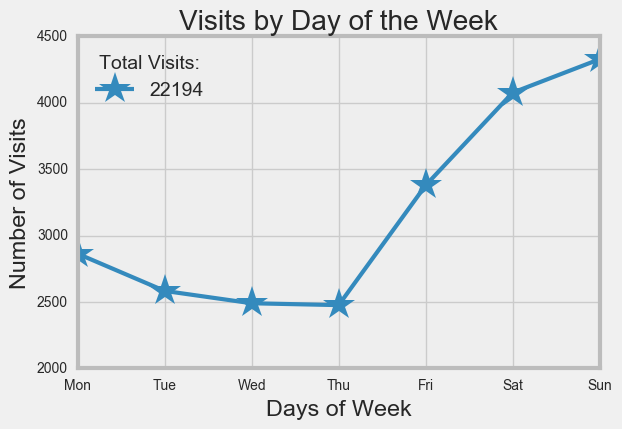

In [68]:
days_totals.plot(lw=3,marker='*',ms=24, 
                 label=str(int(days_totals.sum())))
plt.xlabel('Days of Week')
plt.ylabel('Number of Visits')
plt.title('Visits by Day of the Week')
plt.style.use('bmh')
plt.legend(loc=2,title='Total Visits:',fontsize='medium')

*Number of visits grow exponentially during weekend days*   

**Now I want to know the top 10 departments by number of sales**

In [77]:
cols = df_final.columns.values
l=[]
# to slice the 'Department' columns
for i in cols:
    if i.startswith('D'):
        l.append(i)

In [112]:
ind = np.array([i.split('_') for i in l])

In [116]:
dep_totals = df_final[l].sum().sort_values(ascending=False)
dep_totals.index = list(ind[:,1])

1-HR PHOTO                 3287.0
ACCESSORIES                3038.0
AUTOMOTIVE                 2571.0
BAKERY                     2227.0
BATH AND SHOWER            2188.0
BEAUTY                     1679.0
BEDDING                    1263.0
BOOKS AND MAGAZINES        1175.0
BOYS WEAR                  1149.0
BRAS & SHAPEWEAR            859.0
CAMERAS AND SUPPLIES        826.0
CANDY, TOBACCO, COOKIES     813.0
CELEBRATION                 733.0
COMM BREAD                  707.0
CONCEPT STORES              548.0
COOK AND DINE               525.0
DAIRY                       518.0
DSD GROCERY                 463.0
ELECTRONICS                 443.0
FABRICS AND CRAFTS          400.0
dtype: float64

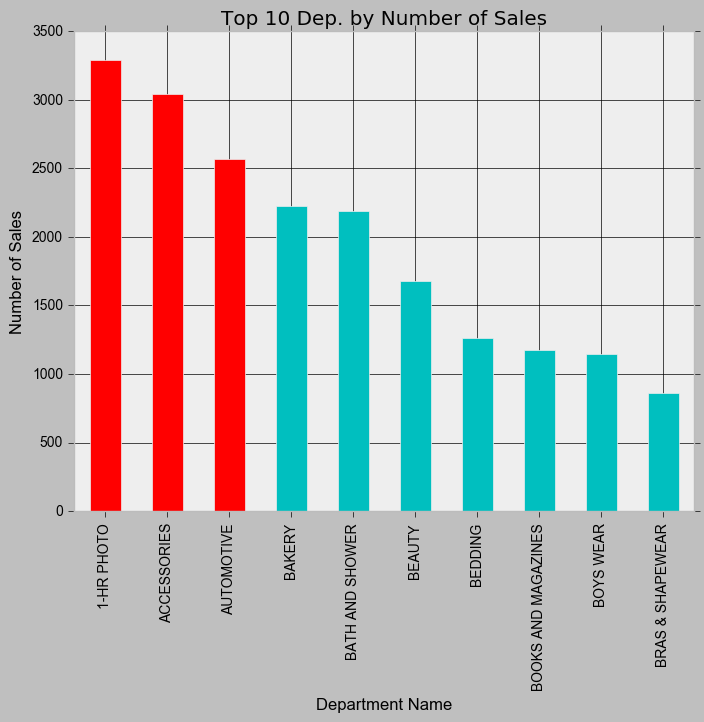

In [378]:
dep_totals.head(10).plot(kind='bar', color='rrrccccccc')
plt.xlabel('Department Name')
plt.ylabel('Number of Sales')
plt.title('Top 10 Dep. by Number of Sales')

# K-MEANS 

## Elbow Method 

In [214]:
# to get the columns that will be used for the K-Means algorithm.
raw = df_final.iloc[:,1:]

In [233]:
# I will iterate the loop 20 times (about 10 min. processing time). 
# Increasing this value would prolong processing time too much.
dist,c=([],1)
while (c < 20):
    model = KMeans(n_clusters=c, random_state=0)
    model.fit(raw)
    dist.append(model.inertia_)
    c+=1

(0, 20)

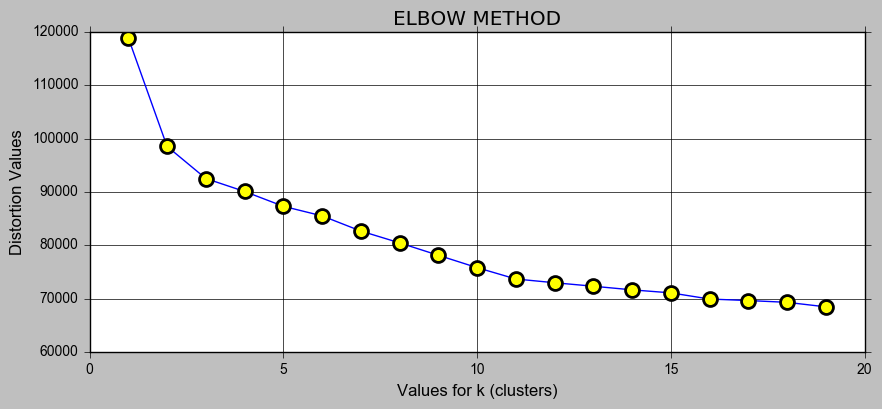

In [268]:
# to plot the list of inertia (distortion) values
plt.style.use('grayscale')        
fig, ax=plt.subplots(figsize=(10,4))
ax.plot(range(1,20),dist,c="blue", 
        lw=1, ls='-', marker='o', ms=10,
       mfc='yellow', mew=2,)
ax.grid(True)
ax.set_title('ELBOW METHOD')
ax.set_ylabel('Distortion Values')
ax.set_xlabel('Values for k (clusters)')
ax.set_xlim(0,20)

<sub>
According to this method the best value for k would be 3; it is the point where distortion starts to rapidly increase. I was not expecting this result. I thought the best value would be closer to the number of categories indicated by Walmart (38). Even though I used a small sample, I was expecting a much much greater value. This is a clear example that intrinsic numerical analysis methods are not enough by themselves to determine the appropriate number of clusters. As stated in the Kaggle competition: "Currently, Walmart's trip types are created from a combination of existing customer insights ("art") and purchase history data ("science")." 

## Silhouette Method

In [417]:
# Let's explore how the Silhouette Plot performs for different values of k 
from sklearn.metrics import silhouette_samples

In [430]:
# to generate 14 models for k in range (2,16)
m = []
for k in range(2,16):
    model = KMeans(n_clusters=k, random_state=0)
    m.append(model.fit(raw))

In [431]:
clusters = [c.labels_ for c in m]

In [432]:
# to generate the coefficients
coefs = [silhouette_samples(raw,i) for i in clusters]  

In [433]:
# to set the number of labels and clusters
unique_labels_list = [np.unique(i) for i in clusters]
clusters_total_num = [i.shape[0] for i in unique_labels_list]

In [434]:
from matplotlib import cm

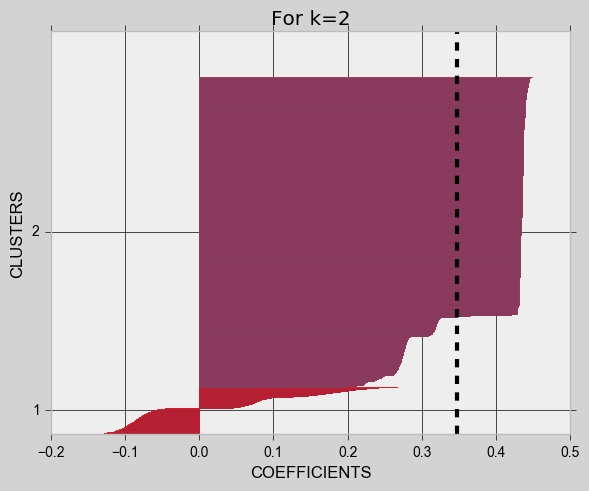

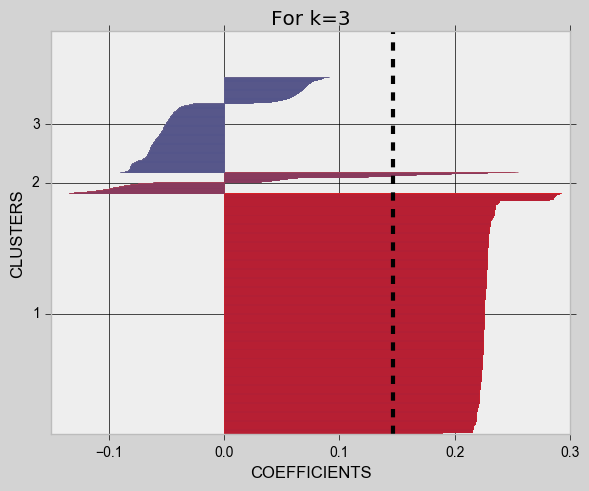

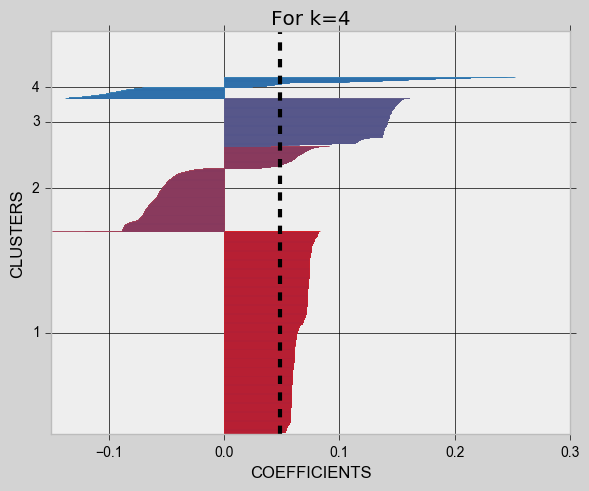

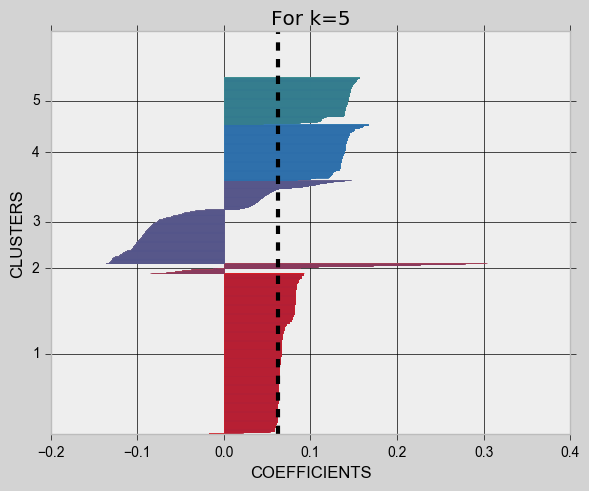

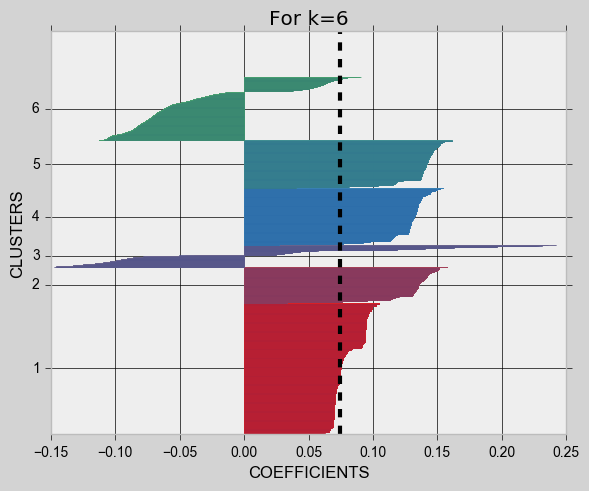

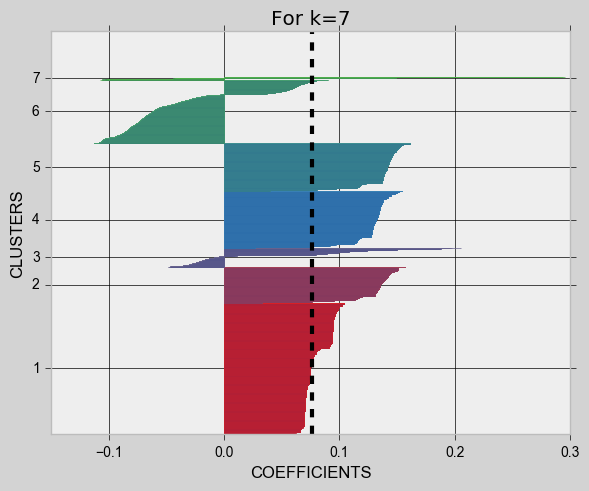

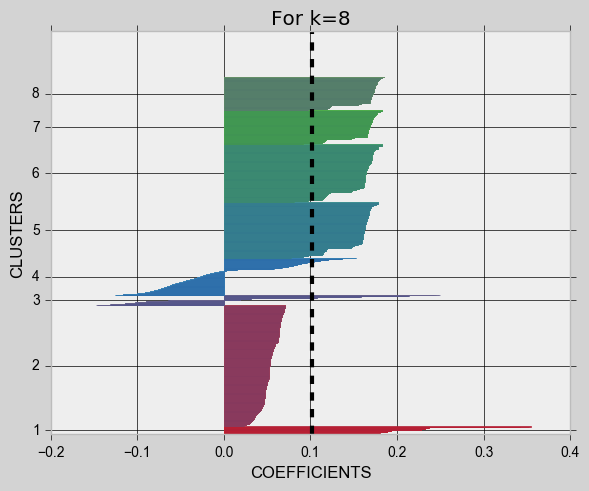

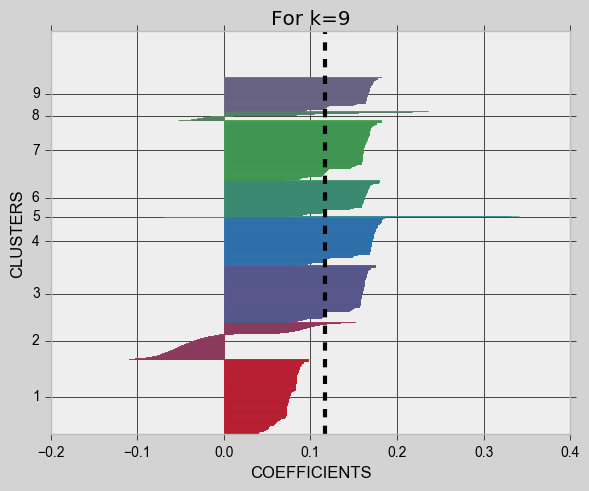

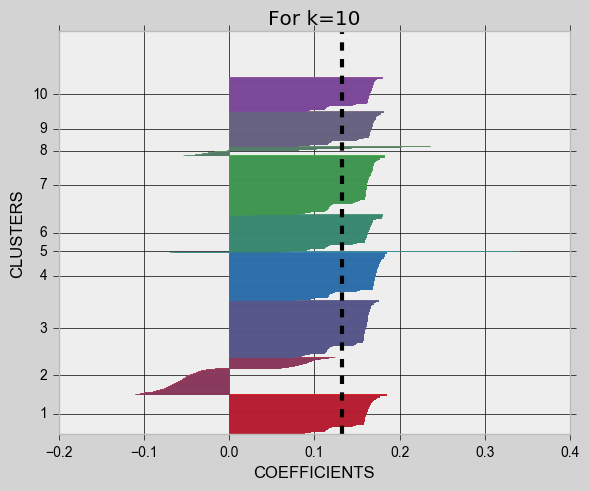

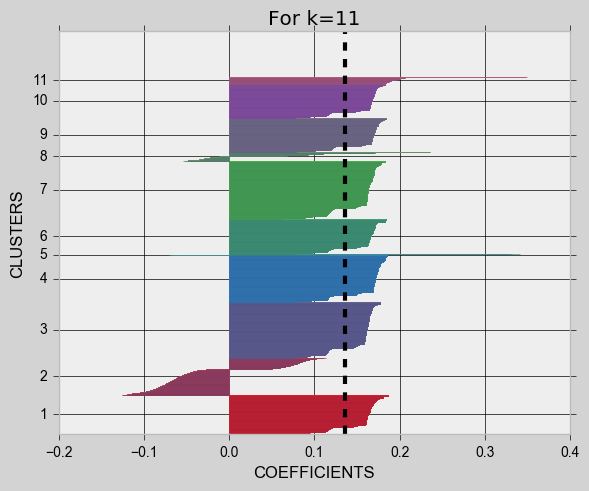

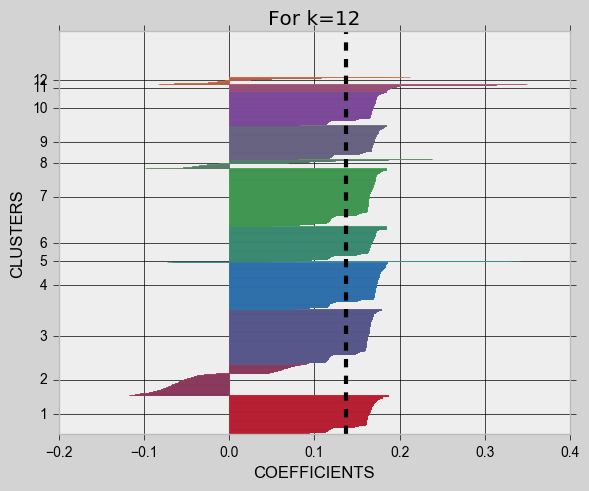

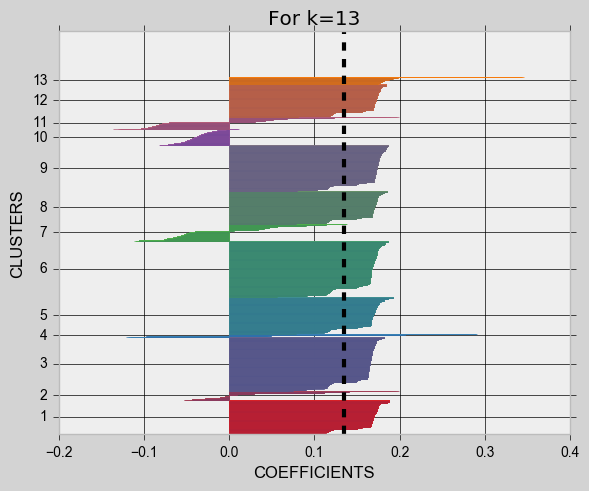

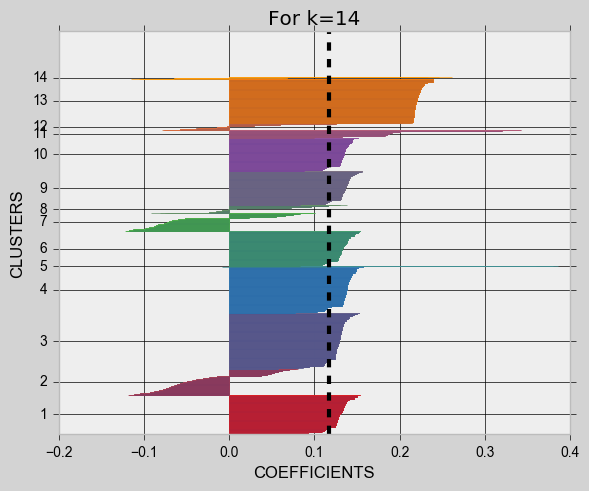

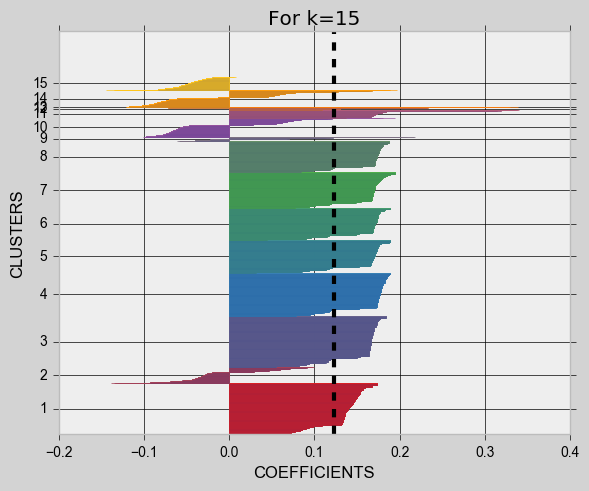

In [435]:
# loop to generate 14 plots starting from k=2
for i in range(0,14):
    col=.01
    y_low,y_up=0,0 
    ticks =[]
    plt.figure(figsize=(6,5), facecolor='lightgray',frameon=True)
    plt.style.use('seaborn-dark-palette')
    plt.title('For k='+str(i+2))
    for b in unique_labels_list[i]:        
        val_c = coefs[i][clusters[i]==b]
        val_c.sort()
        y_up += len(val_c)
        cl =cm.Set1(X=col)        
        #plot
        plt.barh(bottom=range(y_low, y_up), 
                width=val_c, 
                height=1.2,
                edgecolor=cl)
        ticks.append((y_low+y_up)/2)
        y_low += len(val_c)
        col += .04

    #to get the coefficients average and plot it as a line    
    coef_avg = np.mean(coefs[i]) 
    plt.axvline(coef_avg, color="black", ls='--', lw=3)

    #to modify the ticks
    plt.yticks(ticks, unique_labels_list[i]+1)
    plt.ylabel('CLUSTERS')
    plt.xlabel('COEFFICIENTS')
    plt.tight_layout()

**Conclusion:** none of the Silhouettes show a perfect value for k. All values in this analysis show clusters with negative coefficients. There is a clear pattern however, that as k increases, the clusters become more uniform and well above the mean coefficient line. It could be possible to get a better value by increasing k but due to processing time I must stop here. I was expecting to get a good Silhouette plot for low values for k (as shown in the elbow plot) but looks like the relationship between the elbow and silhouette plots is not very clear with larger datasets. It might depend on the distributions within and between each cluster (as seen in more uniform distributed data points with make_blobs()).
This exercise has shown the importance of expertise in the field of research since it is impossible to come up with an appropriate number of clusters with mere data mining methods. Clustering will depend on the industry and, in particular, the organization where the data is coming from.